In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import typing

# Problem 1

In [2]:
#============================================================
# Main function for Problem 1
# 5 February 2023
# Kara Smith
#============================================================
def problem_1():
    sequence_length = 100
    fib_list = fibonacci_table(sequence_length)
    ratio_lst = [fib_list[i]/fib_list[i-1] for i in range(2, sequence_length+1)]

    plt.title("Convergence of F_n / F_(n-1)")
    plt.xlabel("n")
    plt.ylabel("F_n / F_(n-1)")
    plt.plot(range(2, sequence_length+1), ratio_lst)
    
#============================================================
# Parameters:
# - table_length : Number of Fibonacci numbers you wish to compute
# - init         : First two numbers in the sequence (optional)
# Returns:
# - A table containing the Fibonacci sequence up to the
# - specified length
#============================================================
def fibonacci_table(table_length : int, init : tuple[int] =(0, 1)) -> list[int]:

    if table_length < 0:
        raise ValueError("You cannot generate a Fibonacci table with negative length")
    
    if table_length < len(init):
        return init[:table_length+1]
    
    else:
        table = [None]*(table_length+1)
        table[:len(init)] = init[:len(init)]

        # Computing the fibonacci number with index=table_length 
        # will populate the table up to table_length 
        fib_recr(table_length, table)
    
        return table

#============================================================
# Parameters:
# - index    : Fibonacci number which you wish to compute
# - sequence : Cache of previously computed numbers
# Returns:
# - The requested value of of the Fibonacci sequence
# - This function also populates {sequence} with numbers
# - up to the requested value.
#============================================================
def fib_recr(index : int , sequence : list[int]) -> int:
    
    if sequence[index] != None:
        return sequence[index]
    else:
        sequence[index] = fib_recr(index-1, sequence) + fib_recr(index-2, sequence)
        return sequence[index]

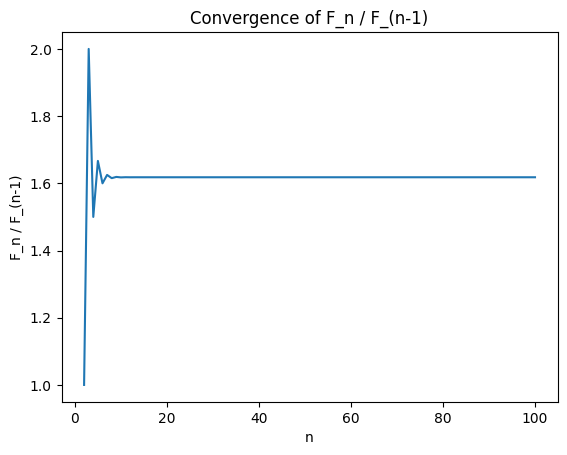

In [3]:
problem_1()

# Problem 2 Parts a and b

In [4]:
#============================================================
# Main function for Problem 2 parts a and b
# 5 February 2023
# Kara Smith
#============================================================
def problem_2a_and_2b():

    # This stores the input that we want to test the functions for
    index_list = [2**i for i in range(16+1)]
    
    # This table will store the run times of the functions we want to test
    runtime_table = pd.DataFrame(data=index_list, columns=['index'])
    
    # List of functions we want to test
    functions = {"recursion": fib_recursion, "tabulation": fib_tabulation, "matrix": fib_matrix}
    
    # When timing the code we want to run it a few times to even out some of the noise
    trials = 20
    
    # Run each function on each input a number of times
    for name, function in functions.items():
        run_times = []
        for index in index_list:
            run_time = 0
            for i in range(trials):
                # If the code crashes we count the time as infinite
                try:
                    start_time = time.perf_counter()
                    function(index)
                    run_time += time.perf_counter() - start_time
                except:
                    run_time = float('inf')
                    
            print(name, index, run_time/trials)
            run_times.append(run_time/trials)
        
        # Add the run times to the dataframe
        runtime_table[name] = run_times.copy()
    
    # Save the runoffs to a csv file        
    runtime_table.to_csv("fibonacci runtimes.csv")

#============================================================
# Computes Fibonacci numbers using recursion
# Parameters:
# - index: index of the Fibonacci number you wish to compute
# Returns:
# - The Fibonacci number of the given index
#============================================================
def fib_recursion(index):
    if index > 50:
        raise ValueError("Index too big")
    if index == 0: 
        return 0
    elif index == 1: 
        return 1
    else: 
        return fib_recursion(index - 1) + fib_recursion(index - 2)

#============================================================
# Computes Fibonacci numbers using tabulation
# Parameters:
# - index: index of the Fibonacci number you wish to compute
# Returns:
# - The Fibonacci number of the given index
#============================================================
def fib_tabulation(index):
    table = [0]*(index+1)
    table[1] = 1
    for i in range(2, index + 1):
        table[i] = table[i-1] + table[i-2]
    
    return table[index]

#============================================================
# Computes Fibonacci numbers using matrix multiplication
# Parameters:
# - index: index of the Fibonacci number you wish to compute
# Returns:
# - The Fibonacci number of the given index
#============================================================
def fib_matrix(index):
    
    Fibonacci_Matrix = [[1, 1], [1, 0]]
    func_list = []
   
    matrix_squared = lambda M : [
        [M[0][0]*M[0][0] + M[0][1]*M[1][0], M[0][0]*M[0][1] + M[0][1]*M[1][1]],
        [M[1][0]*M[0][0] + M[1][1]*M[1][0], M[1][0]*M[0][1] + M[1][1]*M[1][1]]
    ]

    # multiply by [[1, 1], [1, 0]]
    matrix_times_1110 = lambda M : [
        [M[0][0] + M[0][1], M[0][0]],
        [M[1][0] + M[1][1], M[1][0]]
    ]

    # Create a list of the order we square root and divide to get to 1
    while index > 1:
        if index % 2 == 0:
            index /= 2
            func_list.append(matrix_squared)
        else:
            index -= 1
            func_list.append(matrix_times_1110)
    
    # Run that list backwards to square and multiply
    for func in func_list[::-1]:
        Fibonacci_Matrix = func(Fibonacci_Matrix)
    
    return Fibonacci_Matrix[0][1]

In [5]:
problem_2a_and_2b()

recursion 1 2.000248059630394e-07
recursion 2 2.449960447847843e-07
recursion 4 4.699919372797012e-07
recursion 8 3.034970723092556e-06
recursion 16 0.00015733499312773347
recursion 32 0.33055095503805204
recursion 64 inf
recursion 128 inf
recursion 256 inf
recursion 512 inf
recursion 1024 inf
recursion 2048 inf
recursion 4096 inf
recursion 8192 inf
recursion 16384 inf
recursion 32768 inf
recursion 65536 inf
tabulation 1 3.5498524084687235e-07
tabulation 2 3.099790774285793e-07
tabulation 4 3.600143827497959e-07
tabulation 8 5.550566129386425e-07
tabulation 16 9.500072337687016e-07
tabulation 32 1.5649944543838502e-06
tabulation 64 3.1750183552503587e-06
tabulation 128 5.494977813214064e-06
tabulation 256 1.0980013757944108e-05
tabulation 512 2.4700025096535683e-05
tabulation 1024 5.240999162197113e-05
tabulation 2048 0.00012148503446951509
tabulation 4096 0.00030868002213537695
tabulation 8192 0.0010180599871091544
tabulation 16384 0.0059344149893149735
tabulation 32768 0.023884330037

# Problem 2 Part c

In [6]:
#============================================================
# Main function for Problem 2 part c
# 5 February 2023
# Kara Smith
#============================================================
def problem_2c():
    
    df = pd.read_csv("fibonacci runtimes.csv")
    
    X = df['index'].tolist()
    Y1 = df['recursion'].tolist()
    Y2 = df['tabulation'].tolist()
    Y3 = df['matrix'].tolist()
    
    plt.plot(X, Y1, label="recursion")
    plt.plot(X, Y2, label="tabulation")
    plt.plot(X, Y3, label="matrix")
    plt.xscale('log')
    plt.yscale('log')
    
    plt.title("Run times of Fibonacci functions")
    plt.xlabel("Fibonacci index")
    plt.ylabel("Run time (s)")
    plt.legend()

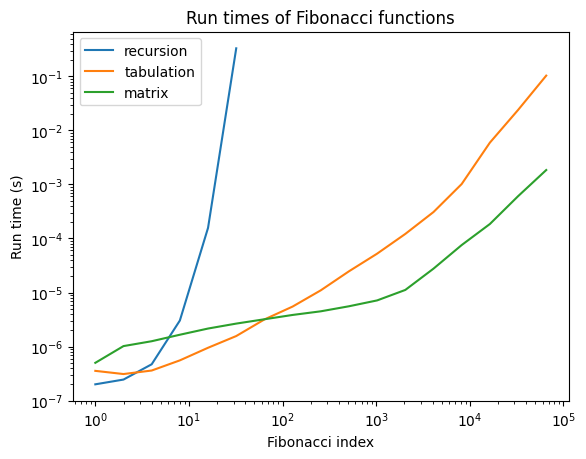

In [7]:
problem_2c()

# Problem 2 Part d

From the log log plot we can see that recursion has exponential time complexity and that tabulation has linear time complexity; the matrix multiplication is logarithmic for small numbers as expected, however it becomes linear at larger values and quite frankly I can't explain it. I've checked the number of multiplications and it is logarithmic, including at high values, so I'm just not sure what's going on with the timing of high values.

Regardless, we can see that these growth rates mean that asymptotically the matrix significantly out performs both tabulation and recursion; however, just looking at raw efficiency, the recursion is so simple that for small values it can easily out perform both tabulation and matrix multiplication. This is because it has none of the boiler plate code and initialization that the other two have.